In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data=pd.read_csv(r"D:\RESUME ML PROJECTS\Home Loan Approval\notebooks\home_loan\loan_sanction_test.csv")

In [9]:
test_data=pd.read_csv(r"D:\RESUME ML PROJECTS\Home Loan Approval\notebooks\home_loan\loan_sanction_train.csv")

In [11]:
home_loan=pd.concat([train_data,test_data])

In [12]:
home_loan.shape

(981, 13)

In [13]:
home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [14]:
home_loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN


In [15]:
# drop some cols
home_loan=home_loan.drop(columns="Loan_ID")

In [19]:
home_loan_approval=home_loan.copy()

In [20]:
home_loan_approval.shape

(981, 12)

In [21]:
home_loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [26]:
home_loan_approval.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          366
dtype: int64

In [30]:
home_loan_approval.duplicated().sum()

0

In [31]:
home_loan_approval=home_loan_approval.drop_duplicates()

In [32]:
home_loan_approval.shape

(980, 12)

In [33]:
home_loan_approval.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
home_loan_approval.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,980.000000,980.000000,953.000000,960.000000,901.000000
mean,5179.128571,1603.550939,142.539349,342.183333,0.835738
std,5697.974141,2719.678657,77.457624,65.131997,0.370719
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3795.500000,1115.000000,126.000000,360.000000,1.000000
75%,5510.750000,2365.500000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [35]:
# visualization
home_loan_approval["Gender"].value_counts()

Gender
Male      774
Female    182
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

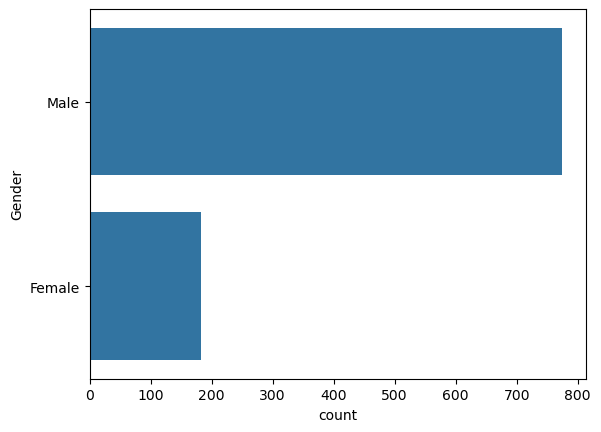

In [36]:
sns.countplot(home_loan_approval["Gender"])

<Axes: xlabel='Dependents', ylabel='Count'>

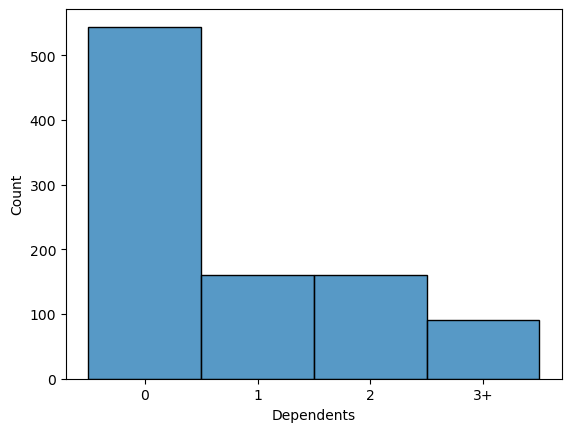

In [37]:
sns.histplot(home_loan_approval["Dependents"])

In [38]:
home_loan_approval.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN


<Axes: xlabel='count', ylabel='Education'>

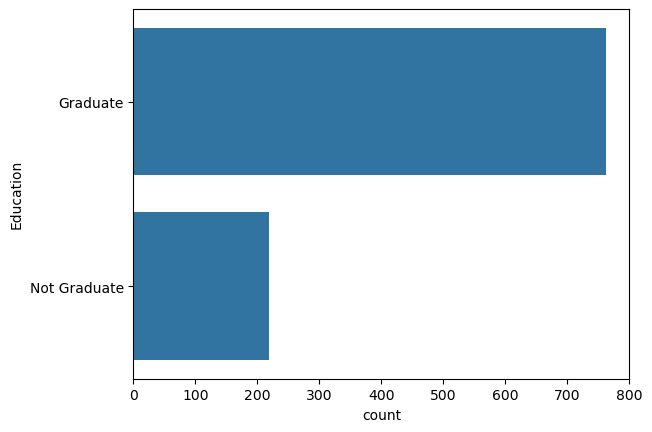

In [40]:
sns.countplot(home_loan_approval["Education"])

<Axes: xlabel='count', ylabel='Self_Employed'>

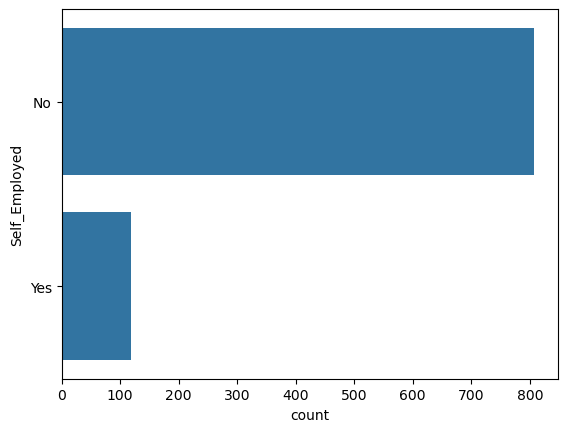

In [41]:
sns.countplot(home_loan_approval["Self_Employed"])

<Axes: xlabel='Property_Area', ylabel='Count'>

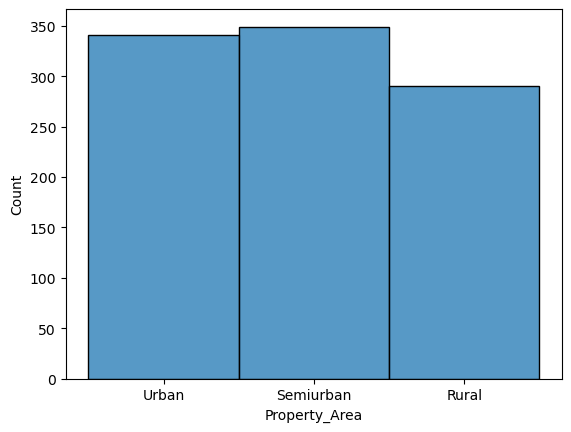

In [42]:
sns.histplot(home_loan_approval["Property_Area"])

What i understood from the data

1.In the Propertuy area semi-urban people are high and next urban and then rural.

2.Self-Employed people are low and majority of the people are unemployed.

3.Graduate of the people are high and ungraduate people are low.

4.In the Dependents category (0,1,2,3) majority contains 0 and remaining are same range.

5.In Gender Category male are high female are low

In [43]:
home_loan_approval.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


<Axes: xlabel='count', ylabel='Loan_Status'>

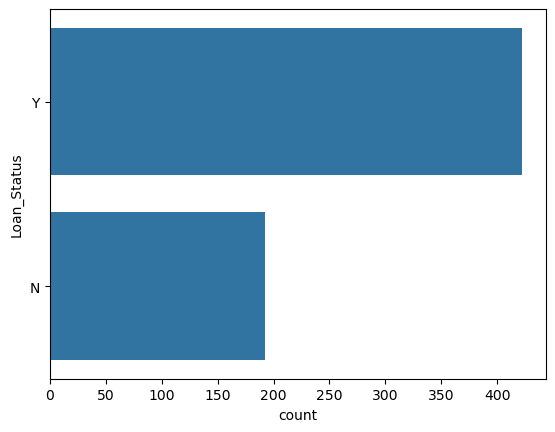

In [44]:
sns.countplot(home_loan_approval["Loan_Status"])

In [45]:
home_loan_approval["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

There is an imbalnced data exist in the target

In [46]:
home_loan_approval["ApplicantIncome"].value_counts()

ApplicantIncome
2500    13
5000    11
3333    10
3500     9
2600     8
        ..
2868     1
8667     1
2283     1
5817     1
7583     1
Name: count, Length: 752, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_9280\2165451391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(home_loan_approval["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

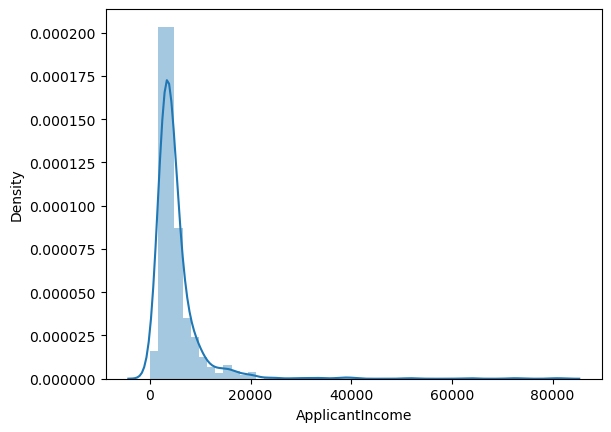

In [47]:
sns.distplot(home_loan_approval["ApplicantIncome"])

C:\Users\HP\AppData\Local\Temp\ipykernel_9280\1702235063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(home_loan_approval["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

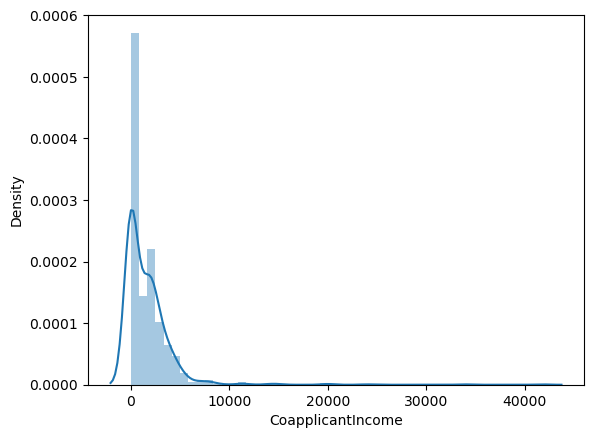

In [48]:
sns.distplot(home_loan_approval["CoapplicantIncome"])

In [49]:
home_loan_approval.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_9280\609281256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(home_loan_approval["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

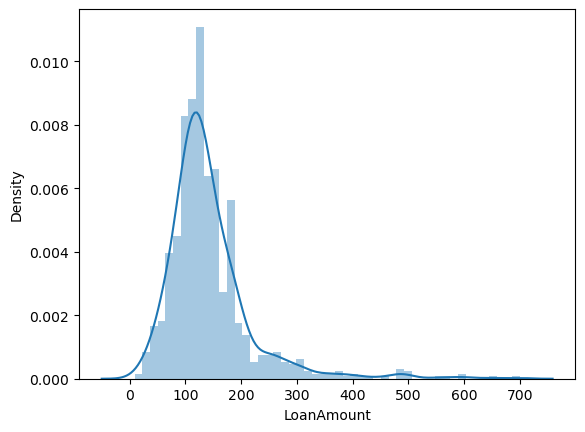

In [50]:
sns.distplot(home_loan_approval["LoanAmount"])

In [53]:
home_loan_approval["Credit_History"].value_counts()

Credit_History
1.0    753
0.0    148
Name: count, dtype: int64

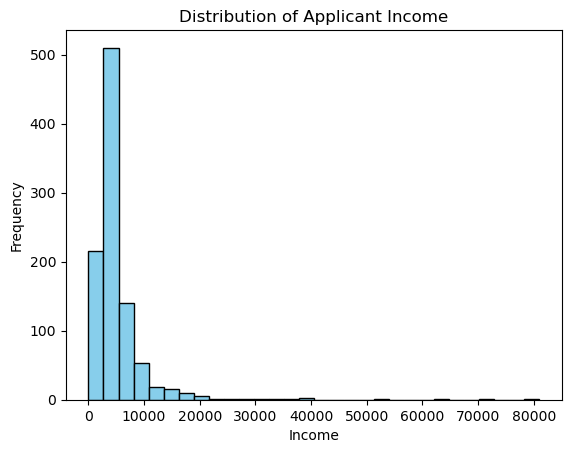

In [56]:
import matplotlib.pyplot as plt

plt.hist(home_loan_approval['ApplicantIncome'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Applicant Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


<Axes: ylabel='ApplicantIncome'>

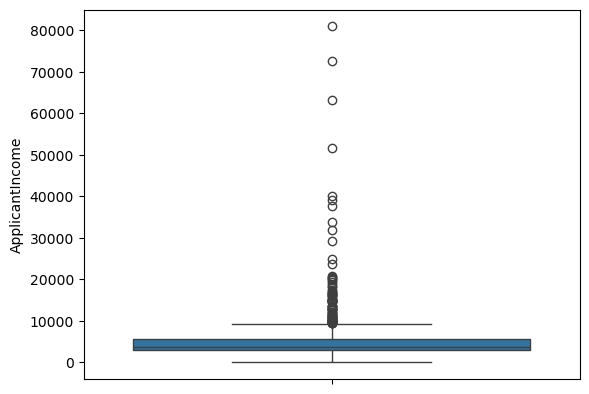

In [58]:
sns.boxplot(home_loan_approval["ApplicantIncome"])

In [61]:
numerical_cols=home_loan_approval.select_dtypes(exclude="object").columns
categorical_cols=home_loan_approval.select_dtypes(include="object").columns

In [62]:
numerical_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [76]:
categorical_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [63]:
# Import necessary libraries
import pandas as pd

# Assuming 'df' is your dataframe
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History','Loan_Amount_Term']  # List your numerical columns

# Loop through each numerical column
for col in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = home_loan_approval[col].quantile(0.25)
    Q3 = home_loan_approval[col].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers by keeping only the values within the bounds
    home_loan_approval = home_loan_approval[(home_loan_approval[col] >= lower_bound) & (home_loan_approval[col] <= upper_bound)]

# Check the cleaned data
print(home_loan_approval.head())


  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male     Yes          0      Graduate            No             5720   
1   Male     Yes          1      Graduate            No             3076   
2   Male     Yes          2      Graduate            No             5000   
4   Male      No          0  Not Graduate            No             3276   
5   Male     Yes          0  Not Graduate           Yes             2165   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       110.0             360.0             1.0   
1             1500.0       126.0             360.0             1.0   
2             1800.0       208.0             360.0             1.0   
4                0.0        78.0             360.0             1.0   
5             3422.0       152.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban         NaN  
1         Urban         NaN  
2         Urban         NaN  
4 

In [149]:
home_loan_approval.shape

(525, 12)

In [150]:
print(home_loan_approval.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [151]:
home_loan_approval.columns = home_loan_approval.columns.str.strip()


In [157]:
if 'Loan_Status' in home_loan_approval.columns:
    print("Column exists!")
else:
    print("Column 'Loan_Status' does not exist.")


Column exists!


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming home_loan_approval is your dataset loaded with pandas
# home_loan_approval = pd.read_csv('your_file.csv') # Example of loading your dataset

# Drop rows where the target variable ('Loan_Status') is missing
home_loan_approval = home_loan_approval.dropna(subset=['Loan_Status'])

# Separate features and target
X = home_loan_approval.drop('Loan_Status', axis=1)  # Dropping target column from features
y = home_loan_approval['Loan_Status']  # Target column

# Define numerical and categorical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                  'Loan_Amount_Term', 'Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                    'Property_Area']  # Removed 'Loan_Status' from categorical_cols

# Numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),  # Handle missing values with median
        ("scaler", StandardScaler())  # Scale numerical features
    ]
)

# Categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values with most frequent
        ("onehotencoder", OneHotEncoder())  # Encode categorical variables
    ]
)

# Column transformer to apply pipelines to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipeline, numerical_cols),
        ("cat_pipeline", cat_pipeline, categorical_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessor to the features (X_train and X_test)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)




In [160]:
y_train.value_counts()

Loan_Status
Y    211
N     43
Name: count, dtype: int64

In [161]:
X_train_scaled

array([[ 1.11615513, -1.00113698,  0.06381703, ...,  1.        ,
         0.        ,  0.        ],
       [-0.94886933,  2.22927474, -0.57334988, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10206545, -1.00113698, -0.36945647, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.35120234, -1.00113698, -1.08308342, ...,  0.        ,
         0.        ,  1.        ],
       [-0.32570014,  0.46428608,  0.6500106 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.77231563,  0.79913705, -0.82821665, ...,  0.        ,
         1.        ,  0.        ]])

In [162]:
X_test_scaled

array([[ 0.82451456,  0.49885134,  1.59301763, ...,  1.        ,
         0.        ,  0.        ],
       [-0.00398005, -1.00113698, -0.31848312, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.14314804,  0.63711239,  0.54806389, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.23742329, -1.00113698,  0.11479039, ...,  0.        ,
         1.        ,  0.        ],
       [-0.02032762, -1.00113698, -0.16556306, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.12400196, -0.09379887,  1.21071748, ...,  1.        ,
         0.        ,  0.        ]])

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [166]:
models={
    "LogisticRegression":LogisticRegression(class_weight='balanced'),
    "RandomForestClassifier":RandomForestClassifier(class_weight='balanced'),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "SVC":SVC(class_weight='balanced')
}

In [167]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
def evluate(true,predicted):
    accuracy_score=accuracy_score(true,predicted)
    precision_score=precision_score(true,predicted)
    f1_score=f1_score(true,predicted)

    return accuracy_score,precision_score,f1_score

In [170]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Y' -> 1 and 'N' -> 0
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now the accuracy, precision, and f1_score functions should work with binary labels


In [174]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

model_list = []
accuracy = []

# Assuming 'models' is a dictionary containing model names as keys and models as values

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on both train and test datasets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate accuracy for training and test datasets
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate precision and F1 score for training and test datasets
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)

    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)


    # Print the model name
    print(f"Model: {model_name}")
    model_list.append(model_name)

    # # Print performance metrics for the training dataset
    # print("Performance for training dataset")
    # print(f"Model Training Accuracy: {model_train_accuracy}")
    # print(f"Model Training Precision: {model_train_precision}")
    # print(f"Model Training F1-Score: {model_train_f1}")
    
    # print("-----------------------------------------------------------------")

    # # Print performance metrics for the testing dataset
    # print("Performance for testing dataset")
    # print(f"Model Testing Accuracy: {model_test_accuracy}")
    # print(f"Model Testing Precision: {model_test_precision}")
    # print(f"Model Testing F1-Score: {model_test_f1}")


    # Print training performance
    print("Performance for Train Data")
    print(f"model_train_accuracy: {model_train_accuracy:.4f}")
    print(f"model_train_precision: {model_train_precision:.4f}")
    print(f"model_train_f1: {model_train_f1:.4f}")
    
    print("--------------------------------------------------")
    
    # Print test performance
    print("Performance for Test Data")
    print(f"model_test_accuracy: {model_test_accuracy:.4f}")
    print(f"model_test_precision: {model_test_precision:.4f}")
    print(f"model_test_f1: {model_test_f1:.4f}")
    
    # Append the test accuracy to the accuracy list
    accuracy.append(model_test_accuracy)

    print("=" * 35)
    print('\n')


Model: LogisticRegression
Performance for Train Data
model_train_accuracy: 0.6457
model_train_precision: 0.9291
model_train_f1: 0.7443
--------------------------------------------------
Performance for Test Data
model_test_accuracy: 0.5312
model_test_precision: 0.8438
model_test_f1: 0.6429


Model: RandomForestClassifier
Performance for Train Data
model_train_accuracy: 1.0000
model_train_precision: 1.0000
model_train_f1: 1.0000
--------------------------------------------------
Performance for Test Data
model_test_accuracy: 0.7969
model_test_precision: 0.8197
model_test_f1: 0.8850


Model: AdaBoostClassifier
Performance for Train Data
model_train_accuracy: 0.8976
model_train_precision: 0.9111
model_train_f1: 0.9404
--------------------------------------------------
Performance for Test Data
model_test_accuracy: 0.7344
model_test_precision: 0.8182
model_test_f1: 0.8411




c:\Users\HP\anaconda3\anacondasharmi\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: GradientBoostingClassifier
Performance for Train Data
model_train_accuracy: 0.9961
model_train_precision: 0.9953
model_train_f1: 0.9976
--------------------------------------------------
Performance for Test Data
model_test_accuracy: 0.8125
model_test_precision: 0.8448
model_test_f1: 0.8909


Model: SVC
Performance for Train Data
model_train_accuracy: 0.7283
model_train_precision: 0.9733
model_train_f1: 0.8089
--------------------------------------------------
Performance for Test Data
model_test_accuracy: 0.5938
model_test_precision: 0.8421
model_test_f1: 0.7111




In [146]:
import numpy as np

# Check if there are any NaN values after transformation
print(np.isnan(X_train_scaled).sum())  # Should return 0
print(np.isnan(X_test_scaled).sum())   # Should return 0


0
0


In [148]:
y_train.isna().sum()

161